## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Explore

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [5]:
train.Survived.mean()

0.3838383838383838

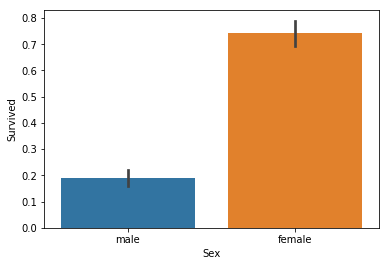

In [6]:
sns.barplot(x=train.Sex, y=train.Survived)

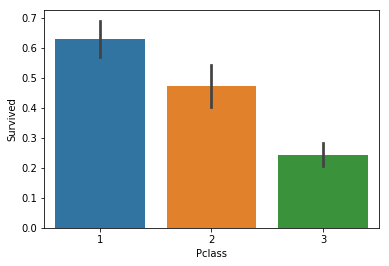

In [7]:
sns.barplot(x=train.Pclass, y=train.Survived)

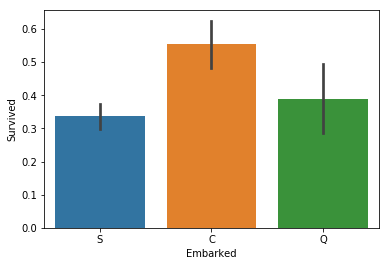

In [8]:
sns.barplot(x=train.Embarked, y=train.Survived)

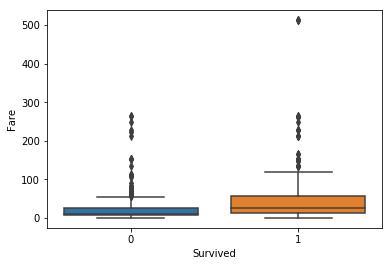

In [9]:
sns.boxplot(x=train.Survived, y=train.Fare)

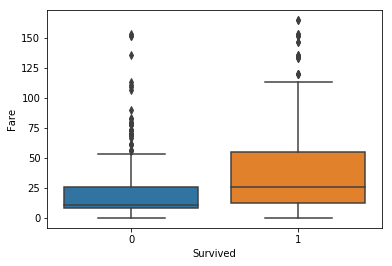

In [10]:
sns.boxplot(x=train[train.Fare<200].Survived, y=train[train.Fare<200].Fare)

## Handling missing values

In [11]:
train = train[pd.notnull(train.Embarked)]

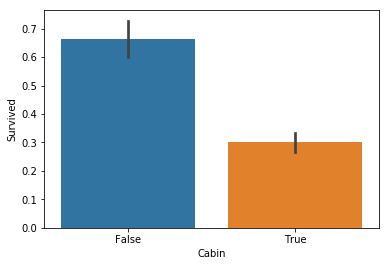

In [12]:
sns.barplot(x=train.Cabin.isnull(), y=train.Survived)

In [13]:
hascabin_train = train.Cabin.notnull().astype(int)
hascabin_test = test.Cabin.notnull().astype(int)

In [14]:
sex_train = pd.get_dummies(train.Sex)
sex_test = pd.get_dummies(test.Sex)

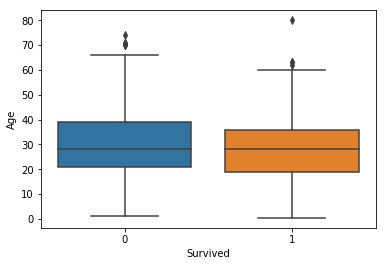

In [15]:
sns.boxplot(x=train.Survived, y=train.Age)

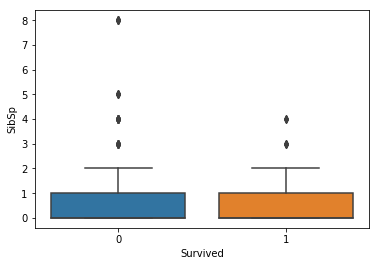

In [16]:
sns.boxplot(x=train.Survived, y=train.SibSp)

In [17]:
train.Age.mean()

29.64209269662921

In [18]:
age_imputed_train = pd.Series()
age_imputed_test = pd.Series()

In [19]:
age_imputed_train = train.Age.isnull().astype(int)
age_imputed_test = test.Age.isnull().astype(int)

In [20]:
age_train = train.Age
age_test = test.Age

In [21]:
age_train[age_train.isnull()] = 30
age_test[age_test.isnull()] = 30

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Construct ML dataset

In [22]:
train_final = pd.concat([train.Pclass, pd.get_dummies(train.Embarked), hascabin_train, sex_train.female, age_train, age_imputed_train], axis=1)

In [23]:
test_final = pd.concat([test.Pclass, pd.get_dummies(test.Embarked), hascabin_test, sex_test.female, age_test, age_imputed_test], axis=1)

In [24]:
X = train_final.as_matrix()

In [25]:
X.shape

(889, 8)

In [26]:
X_train = X[:600]
X_validate = X[600:]
Y_train = train.Survived[:600]
Y_validate = train.Survived[600:]
X_test = test_final.as_matrix()

## Machine learning

In [27]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [28]:
rf = RandomForestClassifier()

In [29]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rf.predict(X_validate)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [31]:
rf.predict_proba(X_validate)

array([[ 0.95050452,  0.04949548],
       [ 0.49166667,  0.50833333],
       [ 0.50119048,  0.49880952],
       [ 0.9       ,  0.1       ],
       [ 1.        ,  0.        ],
       [ 0.83936508,  0.16063492],
       [ 0.8       ,  0.2       ],
       [ 0.2       ,  0.8       ],
       [ 0.        ,  1.        ],
       [ 0.5       ,  0.5       ],
       [ 0.95050452,  0.04949548],
       [ 0.18947696,  0.81052304],
       [ 0.95278879,  0.04721121],
       [ 1.        ,  0.        ],
       [ 0.25333333,  0.74666667],
       [ 1.        ,  0.        ],
       [ 0.1       ,  0.9       ],
       [ 0.3       ,  0.7       ],
       [ 0.97142857,  0.02857143],
       [ 0.56333333,  0.43666667],
       [ 1.        ,  0.        ],
       [ 0.75666667,  0.24333333],
       [ 0.91576618,  0.08423382],
       [ 0.91576618,  0.08423382],
       [ 1.        ,  0.        ],
       [ 0.9       ,  0.1       ],
       [ 0.        ,  1.        ],
       [ 0.77464286,  0.22535714],
       [ 0.95278879,

In [32]:
classifiers = {
    "XGBoost": xgb.XGBClassifier(learning_rate=0.26, n_estimators=21)
    ,"Random Forest": RandomForestClassifier(n_estimators=25)
    ,"AdaBoost": AdaBoostClassifier()
    ,"Naive Bayes": GaussianNB()
    ,"Linear SVM": SVC(kernel="linear", C=0.025, probability=True)
    ,"Gaussian SVM": SVC(gamma=2, C=1, probability=True)
    ,"k-Nearest Neighbors": KNeighborsClassifier(3)
    }

In [33]:
for key, value in classifiers.items():
    print("Fitting " + key + " classifier...")
    value.fit(X_train, Y_train)

Fitting XGBoost classifier...
Fitting Random Forest classifier...
Fitting AdaBoost classifier...
Fitting Naive Bayes classifier...
Fitting Linear SVM classifier...
Fitting Gaussian SVM classifier...
Fitting k-Nearest Neighbors classifier...


In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc, accuracy_score

In [35]:
def plot_roc_curves(classifiers, X, Y):
    plt.figure()
    for key, value in classifiers.items():
        fpr, tpr, thresholds = roc_curve(Y, value.predict_proba(X)[:,1])
        roc_auc = auc(fpr, tpr)
        acc = accuracy_score(Y, value.predict(X))
        print(key + " AUC: " + str(roc_auc) + " Accuracy: " + str(acc))
        plt.plot(fpr, tpr, lw=2, label=key + ' (AUC: %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", prop={'size': 8})
    plt.show()

XGBoost AUC: 0.872167359667 Accuracy: 0.820069204152
Random Forest AUC: 0.827390852391 Accuracy: 0.80276816609
AdaBoost AUC: 0.859017671518 Accuracy: 0.820069204152
Naive Bayes AUC: 0.862058212058 Accuracy: 0.80276816609
Linear SVM AUC: 0.859927234927 Accuracy: 0.77508650519
Gaussian SVM AUC: 0.800103950104 Accuracy: 0.782006920415
k-Nearest Neighbors AUC: 0.776507276507 Accuracy: 0.771626297578


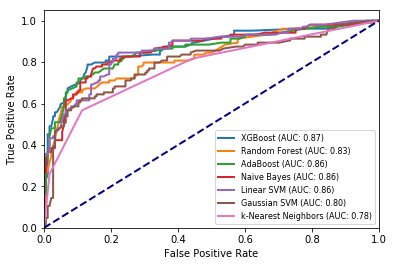

In [36]:
plot_roc_curves(classifiers, X_validate, Y_validate)

In [37]:
classifiers["XGBoost"].predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [44]:
submission = pd.DataFrame()
submission['PassengerId'] = test.PassengerId
submission['Survived'] = classifiers["XGBoost"].predict(X_test)
submission.to_csv('D:\\python-course\\submission.csv', index=False)